In [7]:
import pandas as pd
import numpy as np 

In [8]:
data = pd.read_csv('movie_metadata.csv')

In [9]:
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [12]:
data.shape

(5043, 28)

In [13]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

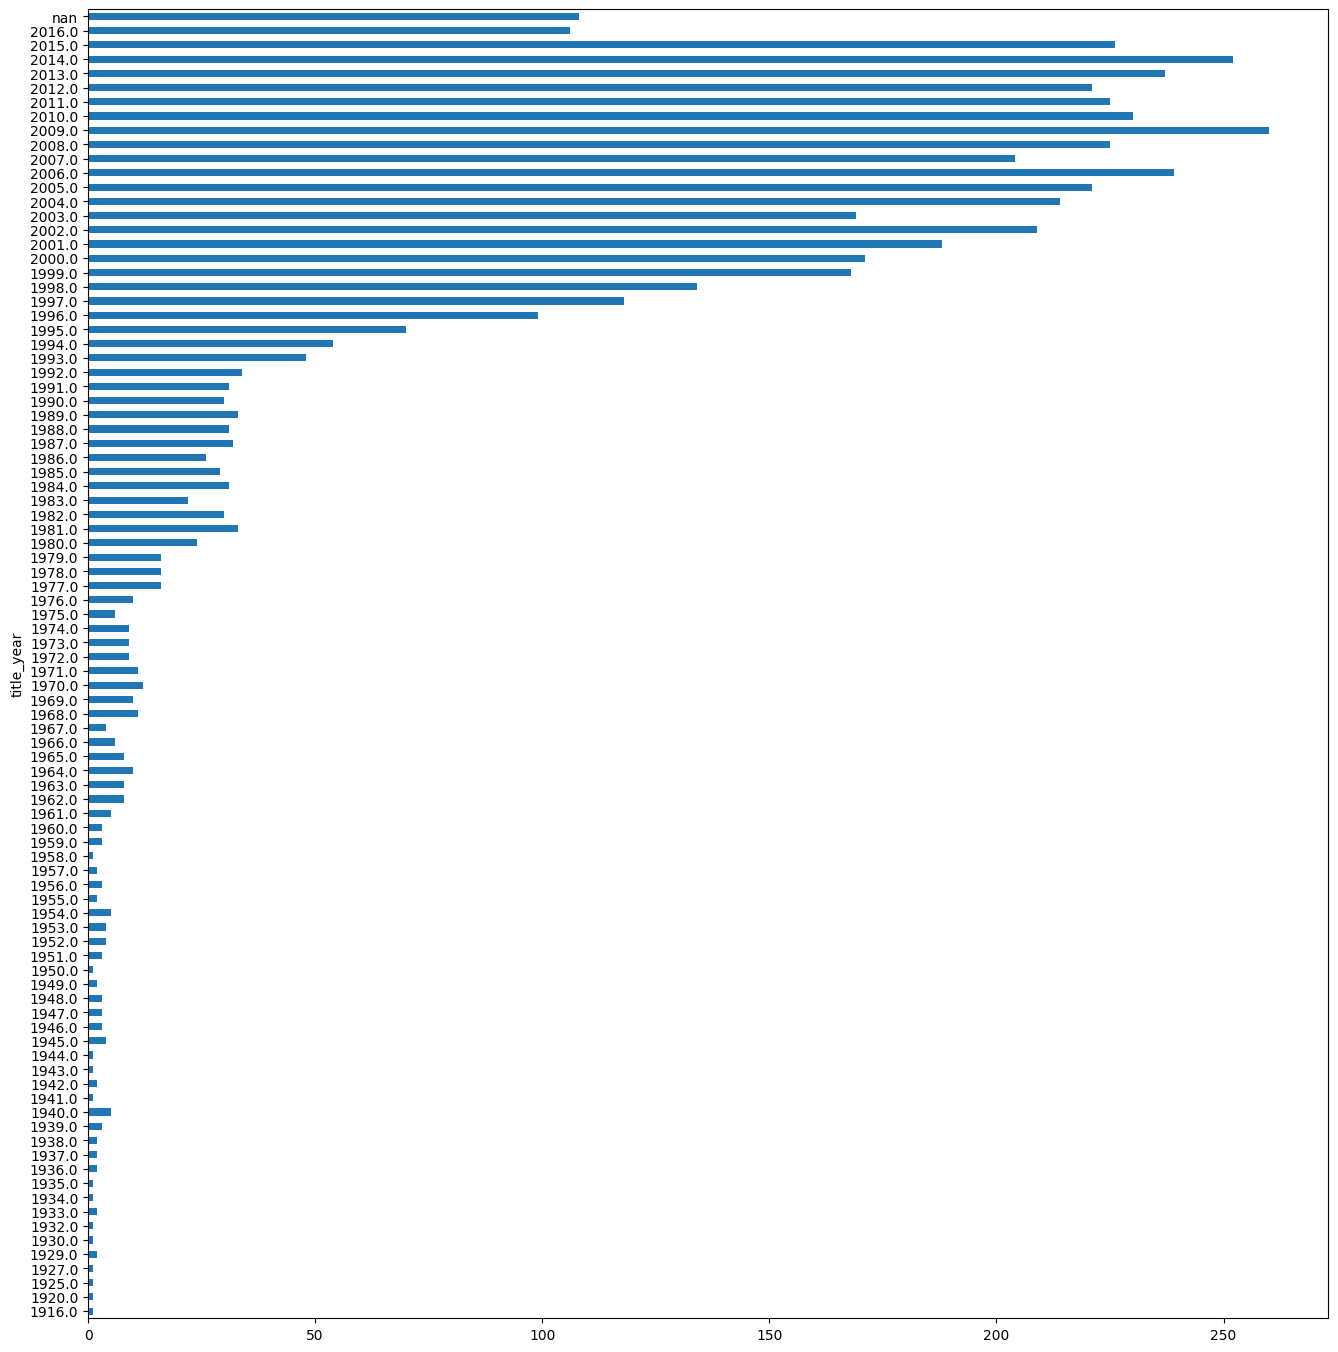

In [17]:
# we have movies only upto the year 2016
import matplotlib.pyplot as plt
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(16,17))
plt.show()

In [18]:
# recommendation will be based on these features only
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [19]:
data.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [20]:
# here we are replacing null value with 'unknown' as we don't know them
data['actor_1_name'] = data['actor_1_name'].replace(np.nan,'unknown')
data['actor_2_name'] = data['actor_1_name'].replace(np.nan,'unknown')
data['actor_3_name'] = data['actor_1_name'].replace(np.nan,'unknown')
data['director_name'] = data['actor_1_name'].replace(np.nan,'unknown')

In [21]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,CCH Pounder,CCH Pounder,CCH Pounder,CCH Pounder,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Johnny Depp,Johnny Depp,Johnny Depp,Johnny Depp,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Christoph Waltz,Christoph Waltz,Christoph Waltz,Christoph Waltz,Action|Adventure|Thriller,Spectre
3,Tom Hardy,Tom Hardy,Tom Hardy,Tom Hardy,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Doug Walker,Doug Walker,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Eric Mabius,Eric Mabius,Eric Mabius,Eric Mabius,Comedy|Drama,Signed Sealed Delivered
5039,Natalie Zea,Natalie Zea,Natalie Zea,Natalie Zea,Crime|Drama|Mystery|Thriller,The Following
5040,Eva Boehnke,Eva Boehnke,Eva Boehnke,Eva Boehnke,Drama|Horror|Thriller,A Plague So Pleasant
5041,Alan Ruck,Alan Ruck,Alan Ruck,Alan Ruck,Comedy|Drama|Romance,Shanghai Calling


In [22]:
data['genres'] = data['genres'].str.replace('|',' ')

In [23]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,CCH Pounder,CCH Pounder,CCH Pounder,CCH Pounder,Action Adventure Fantasy Sci-Fi,Avatar
1,Johnny Depp,Johnny Depp,Johnny Depp,Johnny Depp,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Christoph Waltz,Christoph Waltz,Christoph Waltz,Christoph Waltz,Action Adventure Thriller,Spectre
3,Tom Hardy,Tom Hardy,Tom Hardy,Tom Hardy,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Doug Walker,Doug Walker,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Eric Mabius,Eric Mabius,Eric Mabius,Eric Mabius,Comedy Drama,Signed Sealed Delivered
5039,Natalie Zea,Natalie Zea,Natalie Zea,Natalie Zea,Crime Drama Mystery Thriller,The Following
5040,Eva Boehnke,Eva Boehnke,Eva Boehnke,Eva Boehnke,Drama Horror Thriller,A Plague So Pleasant
5041,Alan Ruck,Alan Ruck,Alan Ruck,Alan Ruck,Comedy Drama Romance,Shanghai Calling


In [24]:
data['movie_title']=data['movie_title'].str.lower()

In [25]:
#null terminating char at the end
data['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [26]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].apply(lambda x: x[:-1])

In [27]:
data['movie_title'][1]

"pirates of the caribbean: at world's end"

In [28]:
data.to_csv('data.csv',index=False)